# **Library Imports**

In [1]:
# import numpy, pandas, seaborn, matplotlib, sklearn just because
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score ,mean_squared_error, roc_curve, roc_auc_score, classification_report, r2_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/josephgrovers/Downloads/Metis - Project 3/Churn_Modelling.csv')

### Let's see what we're working with...

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Cleaning

We need to make dummies for the colulmns we want with object data-types. (geography & gender)

In [9]:
df=pd.concat([df, pd.get_dummies(df.Geography)], axis=1)
df=pd.concat([df, pd.get_dummies(df.Gender)], axis=1)

Now we can drop columns that don't help us, and also drop a couple dummy columns to use as a reference category.

For those reference categories, we will use *Spain* for geography & *Female* for gender.

In [10]:
df.drop(['RowNumber','CustomerId','Surname','Geography', 'Gender', 'Spain', 'Male'], axis=1, inplace=True)

In [11]:
# make columns lowercase
df.columns = map(str.lower, df.columns)

In [12]:
# add underscores between words in column names for readability
df = df.rename(columns = {'creditscore':'credit_score'})
df = df.rename(columns = {'numofproducts':'num_of_products'})
df = df.rename(columns = {'hascrcard':'has_cr_card'})
df = df.rename(columns = {'isactivemember':'is_active_member'})
df = df.rename(columns = {'estimatedsalary':'estimated_salary'})

In [13]:
# Making 'Exited' the last column in the dataframe
df['exitedtemp']=df['exited']
df.drop(['exited'], axis=1, inplace=True)
df['exited']=df['exitedtemp']
df.drop(['exitedtemp'], axis=1, inplace=True)

Data should now be cleaned, now let's check it out.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_cr_card       10000 non-null  int64  
 6   is_active_member  10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   france            10000 non-null  uint8  
 9   germany           10000 non-null  uint8  
 10  female            10000 non-null  uint8  
 11  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [15]:
df.shape

(10000, 12)

# Feature engineering

In [16]:
#  df['balance_over_salary'] = df['balance'] / df['estimated_salary']
#  df['balance_vs_products'] = df['balance'] / df['num_of_products']

Any feature engineering I tried didn't enhance model performance. I'll be sticking to the original columns.

# EDA

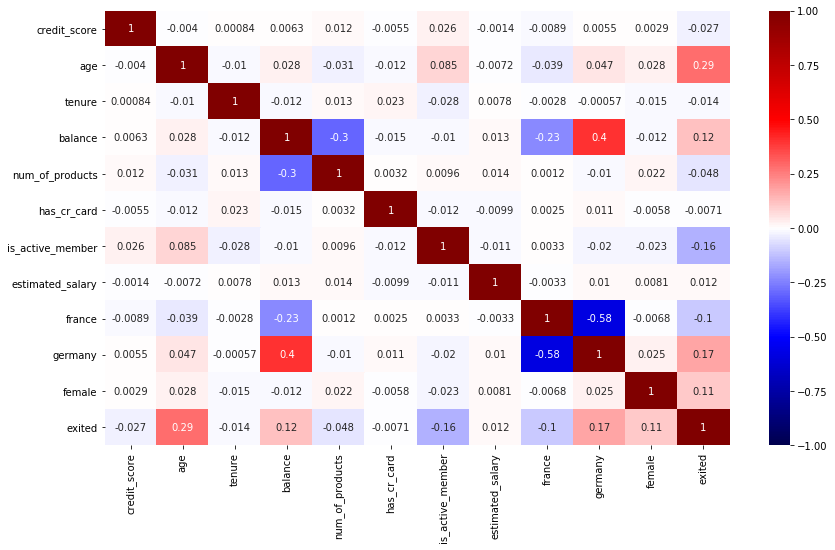

In [144]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

Text(0, 0.5, 'Count')

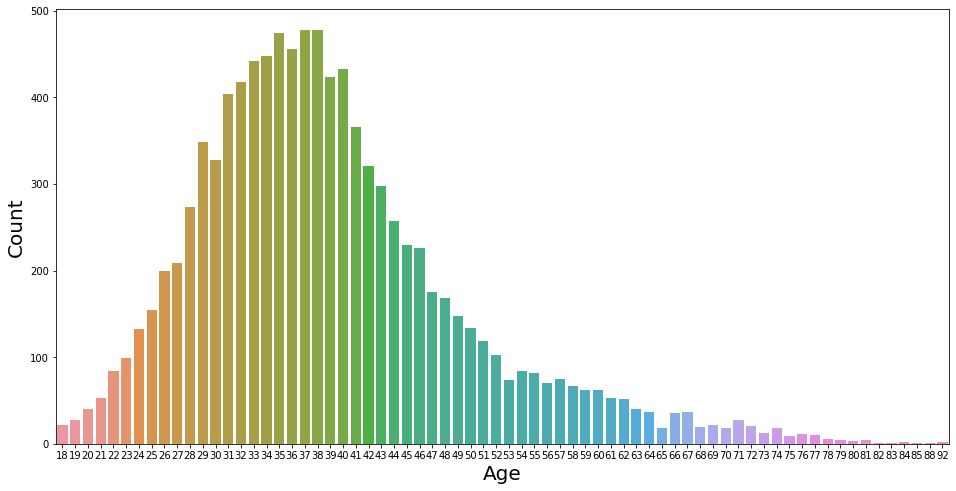

In [18]:
plt.figure(figsize = (16,8))
sns.countplot(df['age']);
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Count', fontsize = 20)

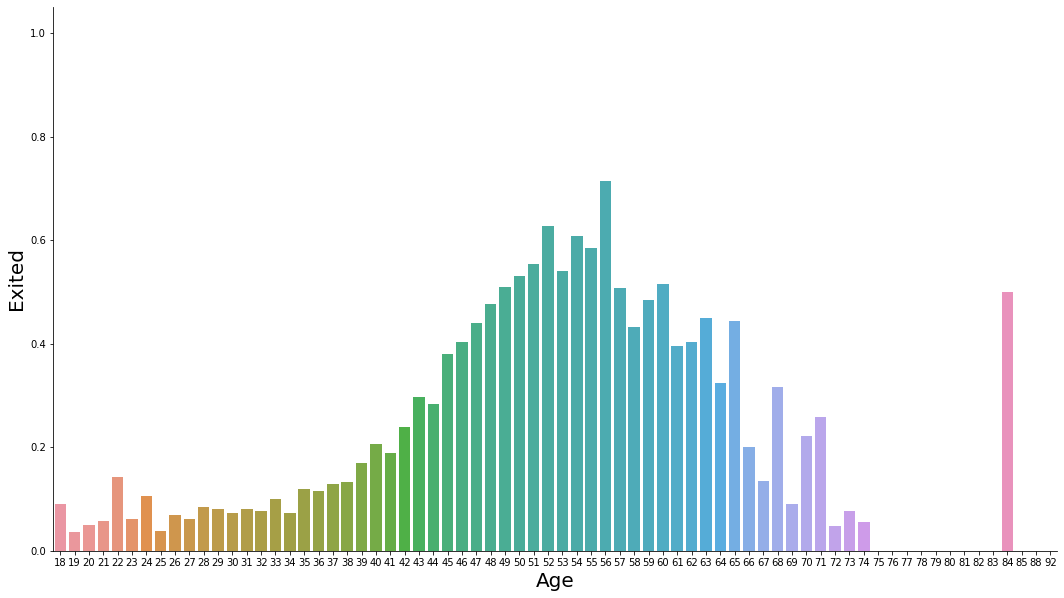

In [143]:
plt.figure(figsize = (18,10))
sns.barplot(x = df['age'], y = df['exited'], errwidth=False);
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Exited', fontsize = 20)
sns.despine(right=True)

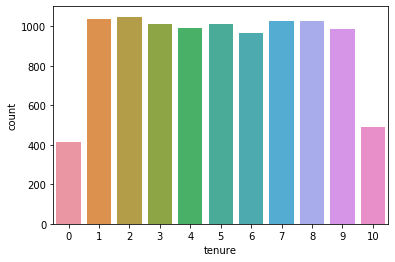

In [20]:
sns.countplot(df['tenure']);

In [115]:
df['num_of_products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: num_of_products, dtype: int64

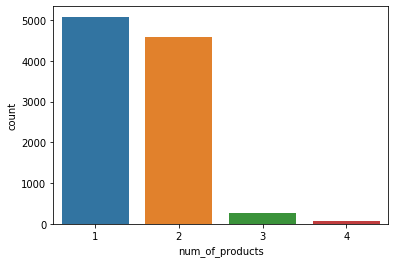

In [21]:
sns.countplot(df['num_of_products']);

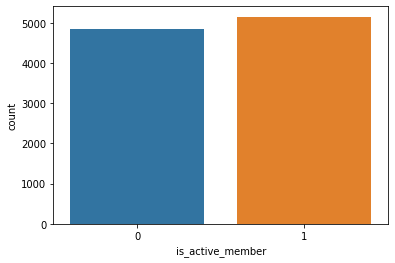

In [22]:
sns.countplot(df['is_active_member']);

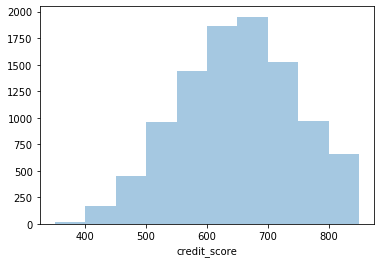

In [23]:
sns.distplot(df['credit_score'], kde=False, bins = 10);

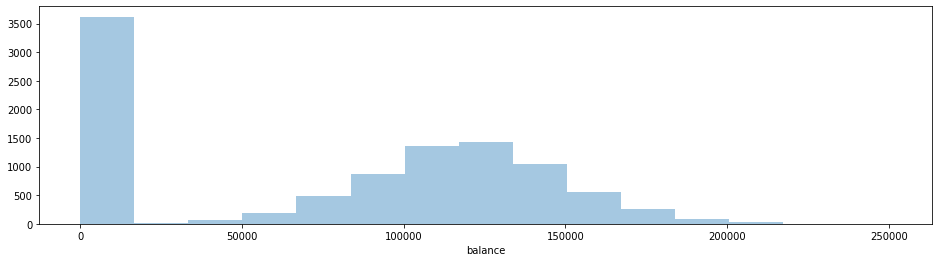

In [24]:
plt.figure(figsize = (16,4))
sns.distplot(df['balance'], kde=False, bins = 15);

In [25]:
df2 = pd.DataFrame(df, columns = ['age', 'exited'])
df2

age  exited
0      42       1
1      41       0
2      42       1
3      39       0
4      43       0
...   ...     ...
9995   39       0
9996   35       0
9997   36       1
9998   42       1
9999   28       0

[10000 rows x 2 columns]

"age" & "balance" had strong correlation with our target variable, "exited", so let's look at some box plots comparing each of those against our target.

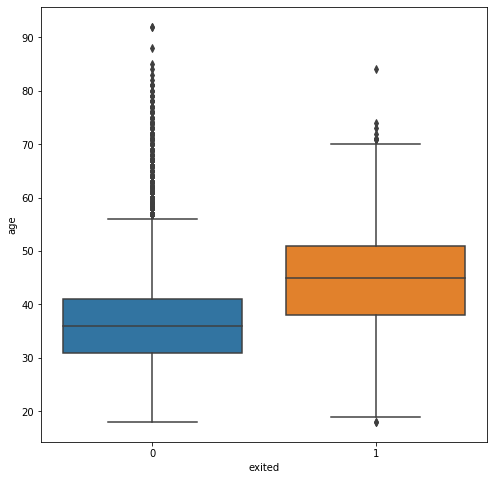

In [26]:
plt.figure(figsize = (8,8))
sns.boxplot(x = df['exited'], y = df['age']);

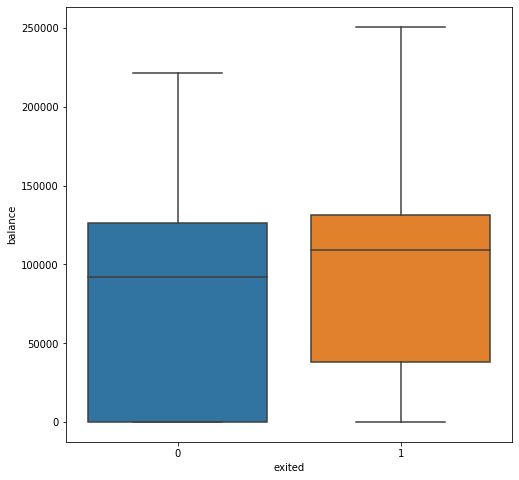

In [27]:
plt.figure(figsize = (8,8))
sns.boxplot(x = df['exited'], y = df['balance']);

Let's see what we have one more time before moving on.

In [28]:
df.head()

credit_score  age  tenure    balance  num_of_products  has_cr_card  \
0           619   42       2       0.00                1            1   
1           608   41       1   83807.86                1            0   
2           502   42       8  159660.80                3            1   
3           699   39       1       0.00                2            0   
4           850   43       2  125510.82                1            1   

   is_active_member  estimated_salary  france  germany  female  exited  
0                 1         101348.88       1        0       1       1  
1                 1         112542.58       0        0       1       0  
2                 0         113931.57       1        0       1       1  
3                 0          93826.63       1        0       1       0  
4                 1          79084.10       0        0       1       0

# Modeling

Assign target variable y, with a few options for our X commented out.

In [29]:
# X = df.iloc[:, 1:2]
    # just age
# X = df.drop(columns = ['credit_score', 'tenure', 'num_of_products', 'has_cr_card', 'estimated_salary', 'spain', 'exited'], axis = 1) 
    # age, balance, active, germany
X = df.iloc[:, :11]
    # everything
y = df.iloc[:, -1]

Normalize the data

In [30]:
X_norm = (X-np.min(X))/(np.max(X)-np.min(X)).values

In [31]:
X_norm.head()

credit_score       age  tenure   balance  num_of_products  has_cr_card  \
0         0.538  0.324324     0.2  0.000000         0.000000          1.0   
1         0.516  0.310811     0.1  0.334031         0.000000          0.0   
2         0.304  0.324324     0.8  0.636357         0.666667          1.0   
3         0.698  0.283784     0.1  0.000000         0.333333          0.0   
4         1.000  0.337838     0.2  0.500246         0.000000          1.0   

   is_active_member  estimated_salary  france  germany  female  
0               1.0          0.506735     1.0      0.0     1.0  
1               1.0          0.562709     0.0      0.0     1.0  
2               0.0          0.569654     1.0      0.0     1.0  
3               0.0          0.469120     1.0      0.0     1.0  
4               1.0          0.395400     0.0      0.0     1.0

Time to split the data out!

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size = 0.2, random_state=42)

### A little previewing of the data before moving forward...

In [33]:
X_train.shape

(8000, 11)

In [34]:
y_test.value_counts() #continues the about 80-20 split

0    1607
1     393
Name: exited, dtype: int64

In [35]:
X_test.head()

credit_score       age  tenure   balance  num_of_products  has_cr_card  \
6252         0.492  0.189189     0.3  0.385452         0.333333          0.0   
4684         0.546  0.337838     0.1  0.000000         0.333333          1.0   
1731         0.502  0.351351     0.4  0.000000         0.333333          1.0   
4742         0.312  0.554054     0.8  0.474902         0.333333          1.0   
4521         0.420  0.121622     0.7  0.498194         0.000000          1.0   

      is_active_member  estimated_salary  france  germany  female  
6252               0.0          0.208904     0.0      1.0     0.0  
4684               1.0          0.731908     1.0      0.0     0.0  
1731               0.0          0.292777     0.0      0.0     1.0  
4742               1.0          0.853422     0.0      1.0     0.0  
4521               1.0          0.573346     0.0      0.0     1.0

## Making Functions for models

Function to see some key metrics for our models

In [36]:
def model_report(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Classification
    print(classification_report(y_test, y_pred))
    
    # Accuracy
    print("Accuracy - Test: ", round((100*model.score(X_test, y_test)),2), '%')  
    print("Accuracy - Train:", round((100*model.score(X_train, y_train)),2), '%')
    #   accuracy = accuracy_score(y_test, y_pred) # these two rows were original way of getting test score
    #   print('Accuracy - Test: ', round(accuracy*100, 2), '%')
    
    # Precision
    precision = precision_score(y_test, y_pred)
    print('Precision:', round(precision*100, 2))
    
    # Recall
    recall = recall_score(y_test, y_pred)
    print('Recall:   ', round(recall*100,2))
    
    # F1
    f1 = f1_score(y_test, y_pred)
    print('F1 Score: ', round(f1 * 100, 2))
    
    # AUC ROC
    prob = model.predict_proba(X_test)[:,1] # change __.predict with model
    roc = roc_auc_score(y_test, prob)
    print('AUC-ROC:  ', round(roc*100,2))

Function to just get accuracy for train & test. This is a piece of what's already included in the above function, model_report.

In [37]:
def train_test_acc(model):
    print("Accuracy - Test: ", round((100*model.score(X_test, y_test)),2), '%')  
    print("Accuracy - Train:", round((100*model.score(X_train, y_train)),2), '%')

Function plot a ROC curve for each model

In [38]:
def roc_plot(model):
    prob=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds=roc_curve(y_test, prob)
    plt.figure(figsize = (8,8))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    
    plt.title('ROC Curve', fontsize = 20)
    plt.xlabel('False positive rate', fontsize = 15)
    plt.ylabel('True positive rate', fontsize = 15)

Function to plot precision vs recall curve for each model

In [39]:
 def prec_rec_plot(model):
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )

    plt.figure(figsize = (8,8))
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.legend(loc='lower left', fontsize = 15)
    plt.xlabel('Threshold (above this probability, label as churner)', fontsize = 15);
    plt.title('Precision and Recall Curves', fontsize = 20);

Function to plot a confusion matrix.

(I will not be using this version of the function, in favor of the threshold-adjustable one below)

In [40]:
def confusion_plot(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    f, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax)
    plt.title('Confusion Matrix')
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()

Function to get confusion matrix, with option to adjust threshold

In [41]:
def confusion_plot_threshold(model,threshold = .5):
    predicted_proba = model.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')


    cm = confusion_matrix(y_test, predicted)

    f, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax)
    plt.title('Confusion Matrix')
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()

Function to get precision score

In [42]:
def get_precision(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    print('Precision:', round(precision*100, 2))

Function to get recall score

In [43]:
def get_recall(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print('Recall:', round(recall*100, 2))

Function to get cross validation scores

In [44]:
def cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    # scores = np.round(scores, 4)
    scores = [score * 100 for score in scores]
    scores = np.round(scores, 2)
    
    print('Cross-Validation Accuracy Scores ->', scores)
    scores = pd.Series(scores)
    print('Minimum CV Accuracy:', round(scores.min(),2), '%')
    print('Mean CV Accuracy:   ', round(scores.mean(),2), '%')
    print('Maximum CV Accuracy:', round(scores.max(),2), '%')

## Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

# change respective to model
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

In [46]:
model_report(lr)

             precision    recall  f1-score   support

          0       0.83      0.96      0.89      1607
          1       0.57      0.19      0.29       393

avg / total       0.78      0.81      0.77      2000

Accuracy - Test:  81.25 %
Accuracy - Train: 81.16 %
Precision: 56.72
Recall:    19.34
F1 Score:  28.84
AUC-ROC:   77.78


In [47]:
cv_scores(lr)

Cross-Validation Accuracy Scores -> [80.15 80.65 80.27 79.4  82.25 81.12 81.98 80.1  81.73 82.85]
Minimum CV Accuracy: 79.4 %
Mean CV Accuracy:    81.05 %
Maximum CV Accuracy: 82.85 %


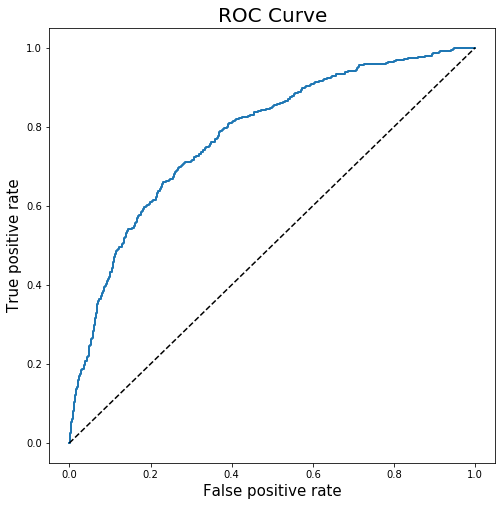

In [48]:
roc_plot(lr)

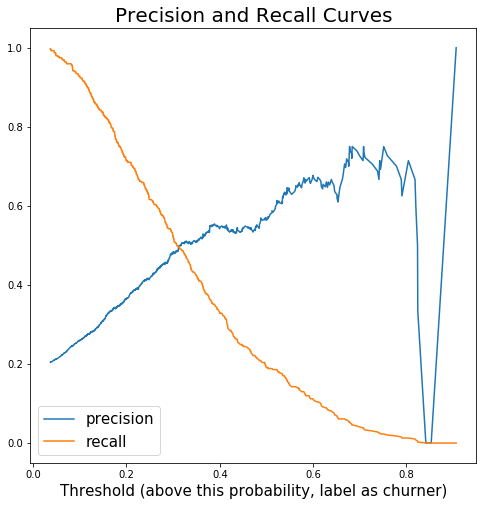

In [49]:
prec_rec_plot(lr)

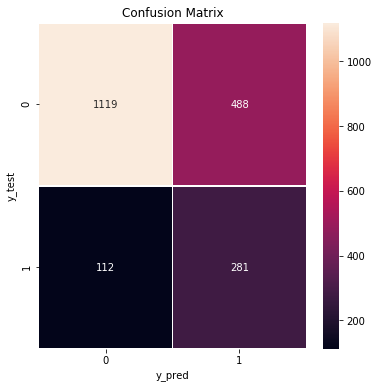

In [129]:
confusion_plot_threshold(lr, .2) # default threshold to get regular confusion_plot function's output would be .5
# .2 is a winner as far as cost-benefit. Overall profit = $1,414,569

Quick aside to  break down the confusion matrix to stamp in the goal here.

TN | FP 

FN | TP 

We want to predict churners. (TP)

We would rather incorrectly classify happy customers(safe from churning) as churners (FP) than to classify churners as happy customers (FN).

Some money would be lost being spent on customers who don't need the extra resources. But it would pay off to cast a bigger net to ensure more customers at-risk of leaving are caught and attended to, even if some extra people get those resources.

In other words, we value recall more here.

---

(Note to self for understanding:

100% recall is attainable by simply classifying all customers as churners. You wouldn't miss one churner! But that would be wasteful to spend company resources to try to retain customers who are already happy with the business.

100% precision is attainable by classifying the few most obvious churners in the dataset and not risking classifying any more as churners. Yes, we'd correctly classify some churners with great certainty, but the model isn't very useful if our threshold only allows for one churner. So we do want to get the recall somewhat high.

A precision & recall of 0 would happen if none were classified as churners at all)

## KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

# change respective to model
knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [52]:
model_report(knn)

             precision    recall  f1-score   support

          0       0.83      0.98      0.90      1607
          1       0.68      0.19      0.29       393

avg / total       0.80      0.82      0.78      2000

Accuracy - Test:  82.25 %
Accuracy - Train: 83.34 %
Precision: 67.59
Recall:    18.58
F1 Score:  29.14
AUC-ROC:   75.2


In [53]:
cv_scores(knn)

Cross-Validation Accuracy Scores -> [82.15 80.77 81.77 82.52 80.12 80.62 82.23 80.48 81.98 81.6 ]
Minimum CV Accuracy: 80.12 %
Mean CV Accuracy:    81.42 %
Maximum CV Accuracy: 82.52 %


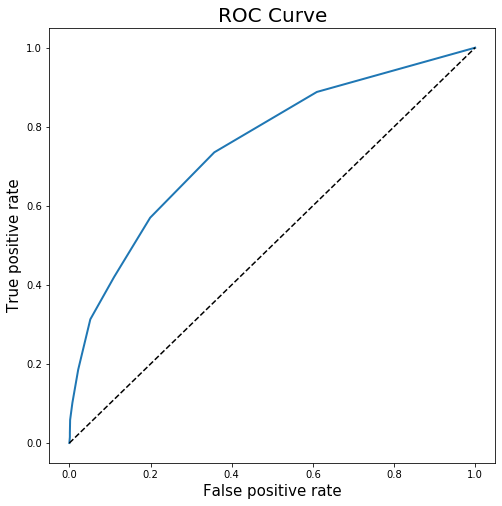

In [54]:
roc_plot(knn)

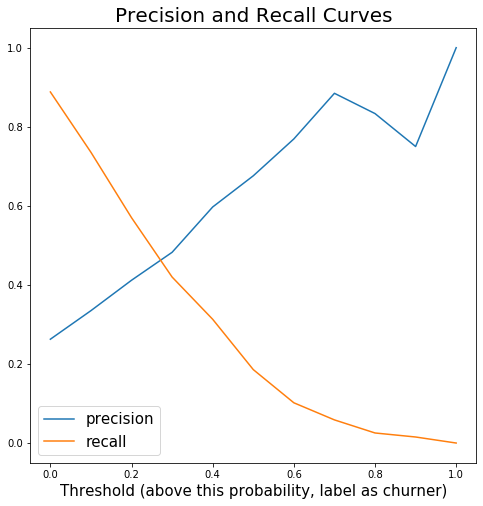

In [55]:
prec_rec_plot(knn)

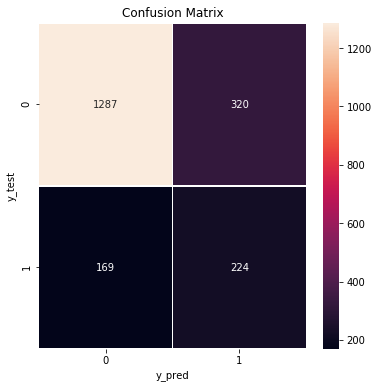

In [128]:
confusion_plot_threshold(knn,.3) # default threshold to get regular confusion_plot function's output would be .55
# .3 is a winner as far as cost-benefit. Overall profit = $1,425,922

## Random Forest

### Validation

In [57]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [59]:
print('Validation Results')
print(clf_rf.score(X_test, y_test))
print(recall_score(y_test, clf_rf.predict(X_test)))
print('\nTest Results')
print(clf_rf.score(X_norm, y,))
print(recall_score(y, clf_rf.predict(X_norm)))

Validation Results
0.828
0.6106870229007634

Test Results
0.9639
0.9204712812960235


### Standard Modeling

In [60]:
# change respective to model

from sklearn.ensemble import RandomForestClassifier

# change respective to model
rf = RandomForestClassifier(n_estimators = 100, random_state = 42) #restrict max depth
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [61]:
model_report(rf)

             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1607
          1       0.76      0.47      0.58       393

avg / total       0.86      0.87      0.85      2000

Accuracy - Test:  86.6 %
Accuracy - Train: 100.0 %
Precision: 75.93
Recall:    46.56
F1 Score:  57.73
AUC-ROC:   85.69


In [62]:
cv_scores(rf)

Cross-Validation Accuracy Scores -> [87.02 85.39 86.14 86.14 86.38 87.   86.86 85.86 86.36 85.36]
Minimum CV Accuracy: 85.36 %
Mean CV Accuracy:    86.25 %
Maximum CV Accuracy: 87.02 %


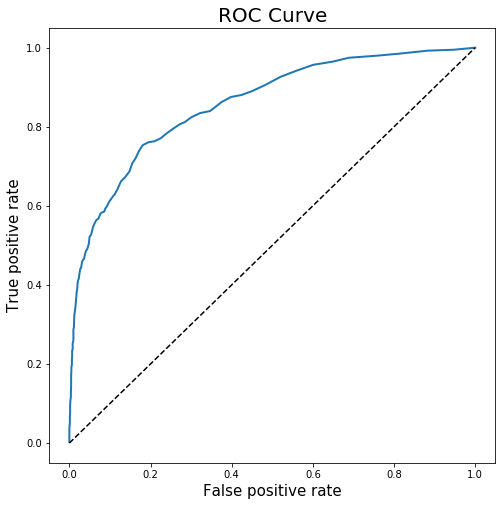

In [63]:
roc_plot(rf)

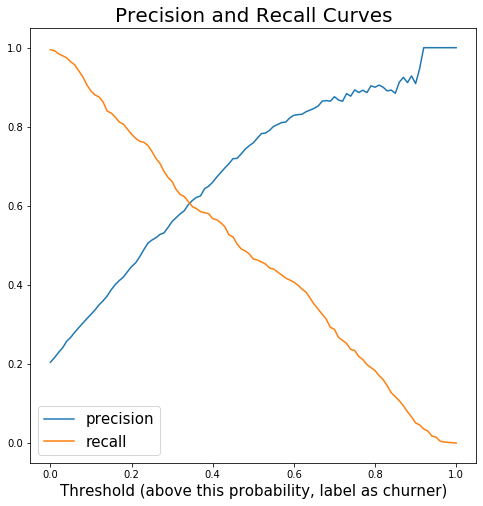

In [147]:
prec_rec_plot(rf)

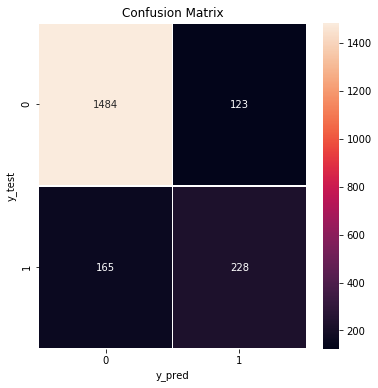

In [130]:
confusion_plot_threshold(rf, .5) # default threshold to get regular confusion_plot function's output would be .51
# .4 is a winner as far as cost-benefit. Overall profit = $1,528,844

## Naive Bayes

In [68]:
# change respective to model

from sklearn.naive_bayes import GaussianNB

# change respective to model
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

In [69]:
model_report(nb)

             precision    recall  f1-score   support

          0       0.86      0.94      0.90      1607
          1       0.60      0.38      0.46       393

avg / total       0.81      0.83      0.81      2000

Accuracy - Test:  82.8 %
Accuracy - Train: 81.96 %
Precision: 59.84
Recall:    37.91
F1 Score:  46.42
AUC-ROC:   79.39


In [70]:
cv_scores(nb)

Cross-Validation Accuracy Scores -> [80.9  80.9  81.27 81.9  83.25 82.   81.6  80.35 82.35 83.1 ]
Minimum CV Accuracy: 80.35 %
Mean CV Accuracy:    81.76 %
Maximum CV Accuracy: 83.25 %


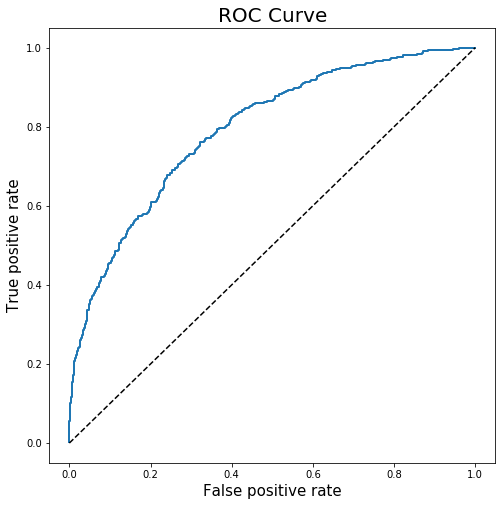

In [71]:
roc_plot(nb)

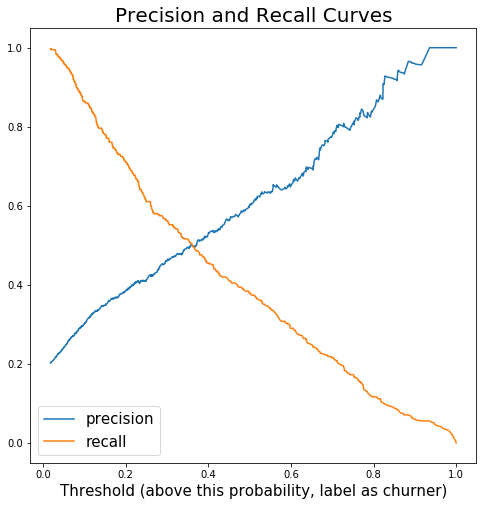

In [72]:
prec_rec_plot(nb)

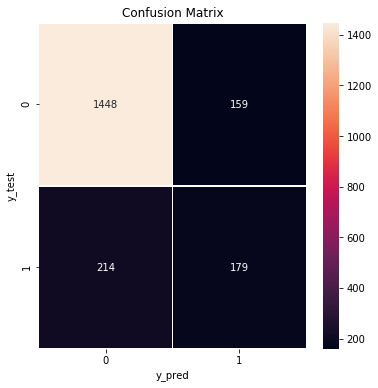

In [134]:
confusion_plot_threshold(nb,.4) # default threshold to get regular confusion_plot function's output would be .5
# .4 is a winner as far as cost-benefit. Overall profit = $1,448,582

## XGBoost

In [74]:
# change respective to model

from xgboost import XGBClassifier

# change respective to model
xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg = xg.predict(X_test)

In [75]:
model_report(xg)

             precision    recall  f1-score   support

          0       0.88      0.95      0.92      1607
          1       0.71      0.49      0.58       393

avg / total       0.85      0.86      0.85      2000

Accuracy - Test:  86.1 %
Accuracy - Train: 95.26 %
Precision: 71.38
Recall:    48.85
F1 Score:  58.01
AUC-ROC:   84.47


In [76]:
cv_scores(xg)

Cross-Validation Accuracy Scores -> [86.52 85.39 84.52 85.14 86.25 86.88 85.86 84.23 84.86 84.36]
Minimum CV Accuracy: 84.23 %
Mean CV Accuracy:    85.4 %
Maximum CV Accuracy: 86.88 %


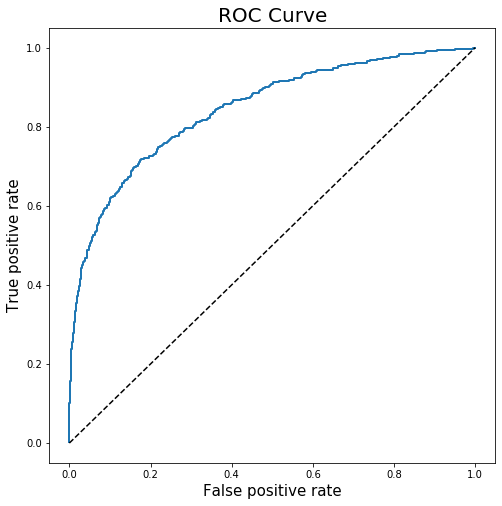

In [77]:
roc_plot(xg)

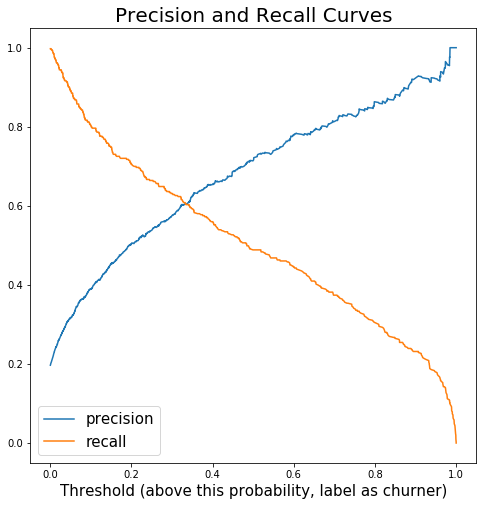

In [78]:
prec_rec_plot(xg)

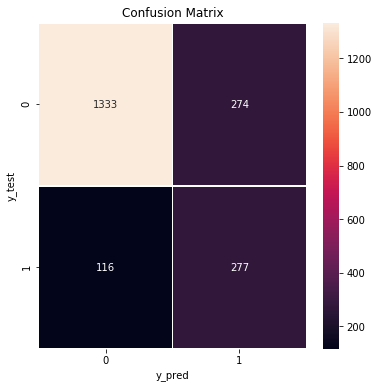

In [139]:
confusion_plot_threshold(xg, .2) # default threshold to get regular confusion_plot function's output would be .5
# .3 is a winner as far as cost-benefit. Overall profit = $1,523,922

# Comparing all models

**Note: Random Forest has the best balance of precision and recall, and the overall best precision. XGBoost had the best overall recall & F1 score, but at the cost of some precision, which is most valued.**

RF - Precision: **76.25**, Recall: 46.56, F1 Score: 57.82

XG - Precision: 71.38, Recall: **48.85**, F1 Score: **58.01**

Text(0, 0.5, 'True Positive Rate')

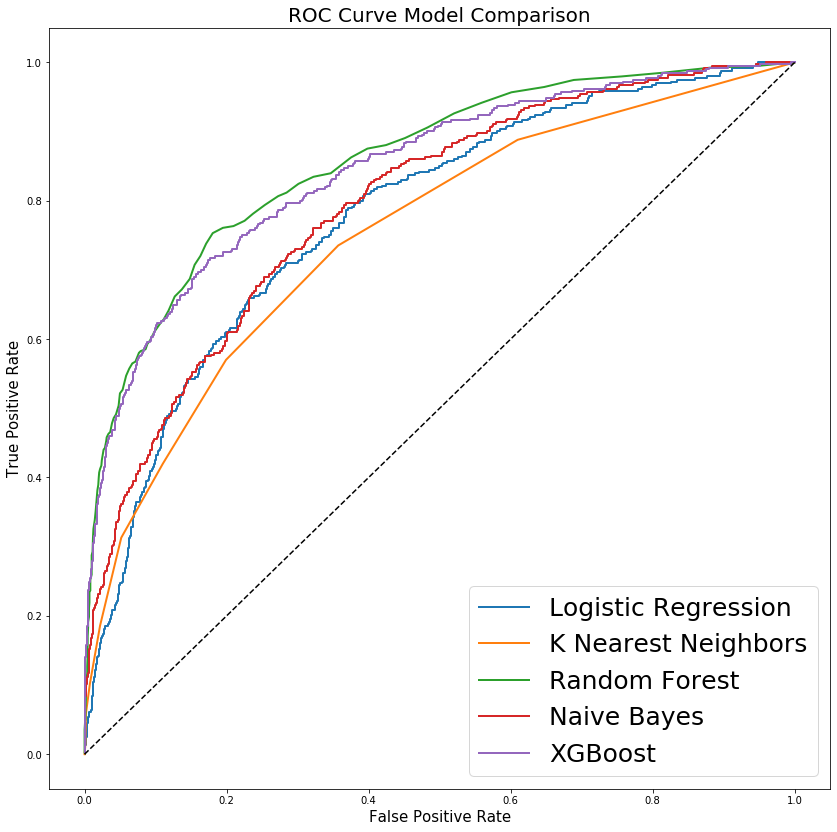

In [149]:
prob_lr=lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds=roc_curve(y_test, prob_lr)

prob_knn=knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds=roc_curve(y_test, prob_knn)

prob_rf=rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds=roc_curve(y_test, prob_rf)

prob_nb=nb.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds=roc_curve(y_test, prob_nb)

prob_xg=xg.predict_proba(X_test)[:,1]
fpr_xg, tpr_xg, thresholds=roc_curve(y_test, prob_xg)

plt.figure(figsize = (14,14))
plt.plot(fpr_lr, tpr_lr, linewidth=2, label = 'Logistic Regression')
plt.plot(fpr_knn, tpr_knn, linewidth=2, label = 'K Nearest Neighbors')
plt.plot(fpr_rf, tpr_rf, linewidth=2, label = 'Random Forest')
plt.plot(fpr_nb, tpr_nb, linewidth=2, label = 'Naive Bayes')
plt.plot(fpr_xg, tpr_xg, linewidth=2, label = 'XGBoost')
plt.plot([0,1], [0,1], 'k--')

plt.legend(loc="lower right", fontsize = 25)
plt.title('ROC Curve Model Comparison', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)

As seen here, Random Forest seems to perform the best, with XGBoost coming close.
(Not sure how to solvethe Train accuracy on Random Forest being 100%)

In [82]:
print('\033[31mLogistic Regression\033[0m')
train_test_acc(lr)
print(' ')
print('\033[31mK Nearest Neighbors\033[0m')
train_test_acc(knn)
print(' ')
print('\033[31mRandom Forest\033[0m')
train_test_acc(rf)
print(' ')
print('\033[31mNaive Bayes\033[0m')
train_test_acc(nb)
print(' ')
print('\033[31mXGBoost\033[0m')
train_test_acc(xg)

Logistic Regression
Accuracy - Test:  81.25 %
Accuracy - Train: 81.16 %
 
K Nearest Neighbors
Accuracy - Test:  82.25 %
Accuracy - Train: 83.34 %
 
Random Forest
Accuracy - Test:  86.6 %
Accuracy - Train: 100.0 %
 
Naive Bayes
Accuracy - Test:  82.8 %
Accuracy - Train: 81.96 %
 
XGBoost
Accuracy - Test:  86.1 %
Accuracy - Train: 95.26 %


Random Forest performs the best as far as precision as well.

In [83]:
print('\033[31mLogistic Regression\033[0m')
get_precision(lr)
print(' ')
print('\033[31mK Nearest Neighbors\033[0m')
get_precision(knn)
print(' ')
print('\033[31mRandom Forest\033[0m')
get_precision(rf)
print(' ')
print('\033[31mNaive Bayes\033[0m')
get_precision(nb)
print(' ')
print('\033[31mXGBoost\033[0m')
get_precision(xg)

Logistic Regression
Precision: 56.72
 
K Nearest Neighbors
Precision: 67.59
 
Random Forest
Precision: 75.93
 
Naive Bayes
Precision: 59.84
 
XGBoost
Precision: 71.38


In [84]:
print('\033[31mLogistic Regression\033[0m')
get_recall(lr)
print(' ')
print('\033[31mK Nearest Neighbors\033[0m')
get_recall(knn)
print(' ')
print('\033[31mRandom Forest\033[0m')
get_recall(rf)
print(' ')
print('\033[31mNaive Bayes\033[0m')
get_recall(nb)
print(' ')
print('\033[31mXGBoost\033[0m')
get_recall(xg)

Logistic Regression
Recall: 19.34
 
K Nearest Neighbors
Recall: 18.58
 
Random Forest
Recall: 46.56
 
Naive Bayes
Recall: 37.91
 
XGBoost
Recall: 48.85


# SHAP - Feature Importance

In [85]:
import shap

In [86]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

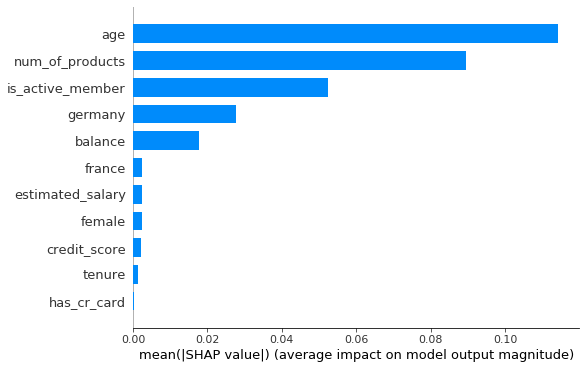

In [87]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

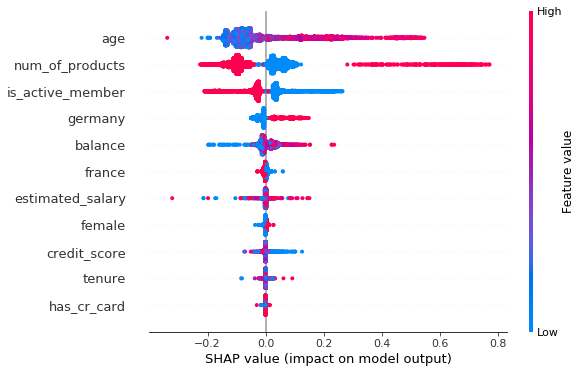

In [88]:
shap.summary_plot(shap_values, X_train)

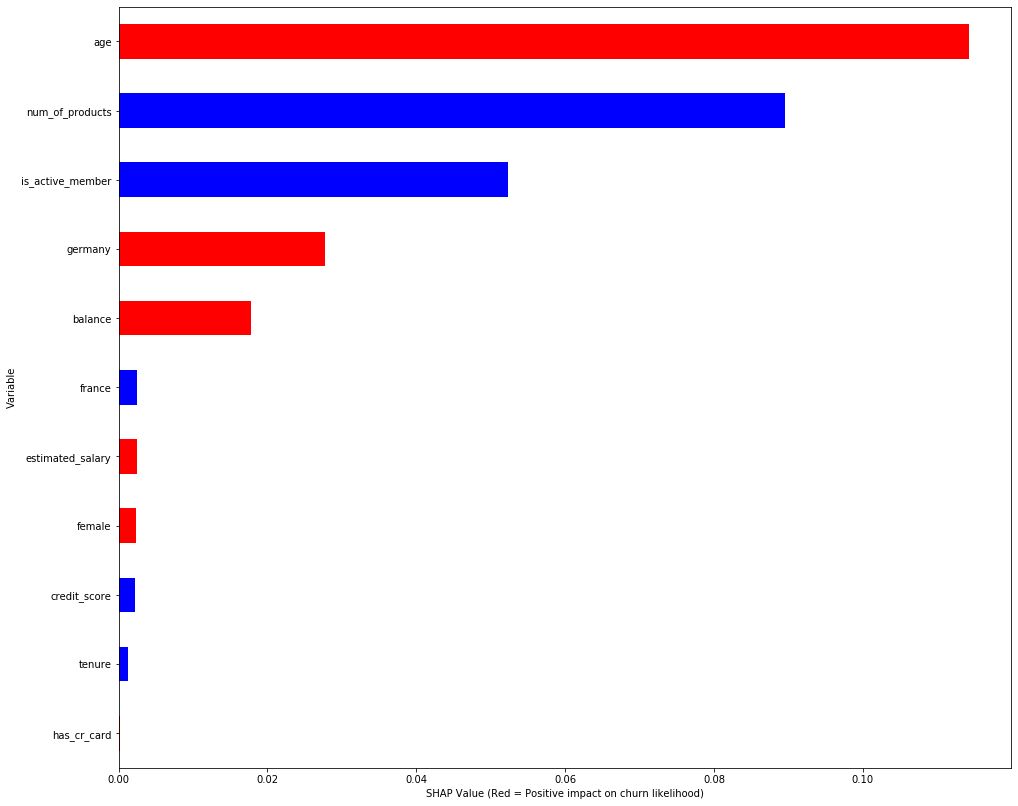

In [141]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(16,14),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive impact on churn likelihood)")
    
ABS_SHAP(shap_values,X_train) 

In [90]:
# using the default threshold of 0.5, which is what predict does
y_predict = rf.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.7593,   Recall: 0.4656


In [91]:
# using the new threshold of 0.06
y_predict = (rf.predict_proba(X_test)[:,1] > 0.06)
print("Threshold of 0.06:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Threshold of 0.06:
Precision: 0.2802,   Recall: 0.9567
